# Calculate zonal-level percent snow coverage from IMS

In [36]:
import geopandas as gpd
import pandas as pd

import sys
sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/DataAccess/Utilities')
import PreProcess_Utils as pputil

sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/Modelling/Utilities')
import General_Utils as gutil

In [1]:
from dask.distributed import LocalCluster

cluster = LocalCluster(n_workers = 10, threads_per_worker = 10, memory_limit = 0) # Refined through testing
client = cluster.get_client()
client # Can open in other window by clicking 'Dashboard' link below

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 10
Total threads: 100,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:55180,Workers: 10
Dashboard: http://127.0.0.1:8787/status,Total threads: 100
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:55251,Total threads: 10
Dashboard: http://127.0.0.1:55259/status,Memory: 0 B
Nanny: tcp://127.0.0.1:55184,


2024-10-29 15:35:50,047 - distributed.nanny - WARNING - Restarting worker
2024-10-29 15:35:50,065 - distributed.nanny - WARNING - Restarting worker
2024-10-29 15:35:50,076 - distributed.nanny - WARNING - Restarting worker
2024-10-29 15:35:50,085 - distributed.nanny - WARNING - Restarting worker
2024-10-29 15:35:50,093 - distributed.nanny - WARNING - Restarting worker
2024-10-29 15:35:50,103 - distributed.nanny - WARNING - Restarting worker
2024-10-29 15:35:50,114 - distributed.nanny - WARNING - Restarting worker
2024-10-29 15:35:50,122 - distributed.nanny - WARNING - Restarting worker
2024-10-29 15:35:50,132 - distributed.nanny - WARNING - Restarting worker
2024-10-29 15:35:50,140 - distributed.nanny - WARNING - Restarting worker


In [2]:
condition = [3,4] # Ice = 3, Snow = 4
valid = [1,2,3,4] # 0 = outside area, rest of values are valid

In [5]:
# Extent shp
area = gpd.read_file(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\Alaska\Extent\Alaska_snowSites.shp", engine = 'pyogrio')
area

,Id,geometry
0,0,"POLYGON ((399535.485 7606266.209, 399535.485 7..."


In [6]:
area.crs

<Projected CRS: EPSG:32606>
Name: WGS 84 / UTM zone 6N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 150°W and 144°W, northern hemisphere between equator and 84°N, onshore and offshore. United States (USA) - Alaska (AK).
- bounds: (-150.0, 0.0, -144.0, 84.0)
Coordinate Operation:
- name: UTM zone 6N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# 2018

## Prepare IMS

In [7]:
year = 2018
path = r'C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\Alaska\2 IMS\ims_nc\IMS_' + str(year) + '.nc'
path

'C:\\Users\\mbonney\\OneDrive - NRCan RNCan\\Projects\\Alaska\\2 IMS\\ims_nc\\IMS_2018.nc'

In [10]:
%%time
ims = pputil.uploadNC(path, type = 'dataarray', chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1})
ims

CPU times: total: 203 ms
Wall time: 1.97 s


<xarray.DataArray (time: 365, y: 73, x: 47)> Size: 1MB
dask.array<open_dataset-__xarray_dataarray_variable__, shape=(365, 73, 47), dtype=uint8, chunksize=(1, 73, 47), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 376B 4.002e+05 4.012e+05 ... 4.452e+05 4.462e+05
  * y            (y) float64 584B 7.679e+06 7.678e+06 ... 7.608e+06 7.607e+06
  * time         (time) datetime64[ns] 3kB 2018-01-01 2018-01-02 ... 2018-12-31
    variable     <U18 72B ...
    spatial_ref  int64 8B ...
Attributes: (12/50)
    _FillValue:                 0
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NESDIS Interactive Multisensor Snow and ...
    summary:                    This file contains a map of snow cover and ic...
    keywords:                   EARTH SCIENCE > CRYOSPHERE > SEA ICE > ICE EX...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Ke...
    ...                         ...
    metadata_link:              https://nsidc.org/data/G02156
    naming_authority:           org.nsidc
    references:                 Ramsay, B. H. (1998). The interactive multise...
    history:                    05 August 2021 17:38Z: NetCDF file generated ...
    source:                     Analysts at the United States National Ice Ce...
    comment:                    The IMS product has changed versions and reso...

In [11]:
ims.rio.crs

CRS.from_epsg(32606)

## Get % snow by time-step

In [13]:
%%time
df_18 = gutil.cubeZonal(ims, area, condition = condition, valid = valid)
df_18

Converted cube to boolean (1 = Meets condition, 0 = Does not meet condition).
Calculated number of valid pixels for all zones (pixels = 3431, zones = 1).
Calculated number of pixels that met condition for all zones (1) and time-steps (365).
Created dataframe where each column is % pixels meeting condition across all time-steps for each zone.
CPU times: total: 2.84 s
Wall time: 14.9 s


,0
time,
2018-01-01,100.0
2018-01-02,100.0
2018-01-03,100.0
2018-01-04,100.0
2018-01-05,100.0
...,...
2018-12-27,100.0
2018-12-28,100.0
2018-12-29,100.0


<Axes: xlabel='time'>

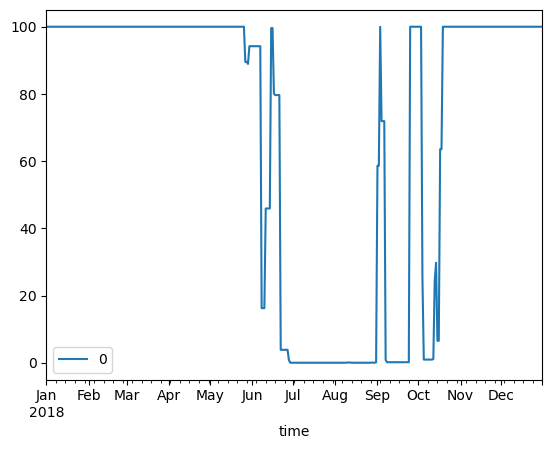

In [14]:
df_18.plot()

# 2019

In [15]:
year = 2019
path = r'C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\Alaska\2 IMS\ims_nc\IMS_' + str(year) + '.nc'
path

'C:\\Users\\mbonney\\OneDrive - NRCan RNCan\\Projects\\Alaska\\2 IMS\\ims_nc\\IMS_2019.nc'

In [16]:
%%time
ims = pputil.uploadNC(path, type = 'dataarray', chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1})
ims

CPU times: total: 15.6 ms
Wall time: 27.3 ms


<xarray.DataArray (time: 365, y: 73, x: 47)> Size: 1MB
dask.array<open_dataset-__xarray_dataarray_variable__, shape=(365, 73, 47), dtype=uint8, chunksize=(1, 73, 47), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 376B 4.002e+05 4.012e+05 ... 4.452e+05 4.462e+05
  * y            (y) float64 584B 7.679e+06 7.678e+06 ... 7.608e+06 7.607e+06
  * time         (time) datetime64[ns] 3kB 2019-01-01 2019-01-02 ... 2019-12-31
    variable     <U18 72B ...
    spatial_ref  int64 8B ...
Attributes: (12/50)
    _FillValue:                 0
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NESDIS Interactive Multisensor Snow and ...
    summary:                    This file contains a map of snow cover and ic...
    keywords:                   EARTH SCIENCE > CRYOSPHERE > SEA ICE > ICE EX...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Ke...
    ...                         ...
    metadata_link:              https://nsidc.org/data/G02156
    naming_authority:           org.nsidc
    references:                 Ramsay, B. H. (1998). The interactive multise...
    history:                    05 August 2021 17:07Z: NetCDF file generated ...
    source:                     Analysts at the United States National Ice Ce...
    comment:                    The IMS product has changed versions and reso...

In [17]:
%%time
df_19 = gutil.cubeZonal(ims, area, condition = condition, valid = valid)
df_19

Converted cube to boolean (1 = Meets condition, 0 = Does not meet condition).
Calculated number of valid pixels for all zones (pixels = 3431, zones = 1).
Calculated number of pixels that met condition for all zones (1) and time-steps (365).
Created dataframe where each column is % pixels meeting condition across all time-steps for each zone.
CPU times: total: 1.42 s
Wall time: 3.07 s


,0
time,
2019-01-01,100.0
2019-01-02,100.0
2019-01-03,100.0
2019-01-04,100.0
2019-01-05,100.0
...,...
2019-12-27,100.0
2019-12-28,100.0
2019-12-29,100.0


<Axes: xlabel='time'>

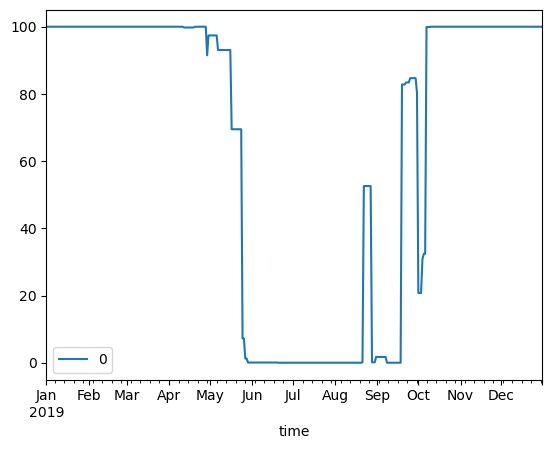

In [18]:
df_19.plot()

# 2020

In [19]:
year = 2020
path = r'C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\Alaska\2 IMS\ims_nc\IMS_' + str(year) + '.nc'
path

'C:\\Users\\mbonney\\OneDrive - NRCan RNCan\\Projects\\Alaska\\2 IMS\\ims_nc\\IMS_2020.nc'

In [20]:
%%time
ims = pputil.uploadNC(path, type = 'dataarray', chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1})
ims

CPU times: total: 15.6 ms
Wall time: 39.2 ms


<xarray.DataArray (time: 366, y: 73, x: 47)> Size: 1MB
dask.array<open_dataset-__xarray_dataarray_variable__, shape=(366, 73, 47), dtype=uint8, chunksize=(1, 73, 47), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 376B 4.002e+05 4.012e+05 ... 4.452e+05 4.462e+05
  * y            (y) float64 584B 7.679e+06 7.678e+06 ... 7.608e+06 7.607e+06
  * time         (time) datetime64[ns] 3kB 2020-01-01 2020-01-02 ... 2020-12-31
    variable     <U18 72B ...
    spatial_ref  int64 8B ...
Attributes: (12/50)
    geospatial_lon_min:         -180.0
    creator_institution:        U.S. National Ice Center (USNIC)
    id:                         G02156
    contributor_name:           U.S. National Ice Center, NOAA at NSIDC, NOAA...
    keywords:                   EARTH SCIENCE > CRYOSPHERE > SEA ICE > ICE EX...
    _FillValue:                 0
    ...                         ...
    contributor_role:           Producer, Publisher, Advisor, Software Develo...
    publisher_email:            nsidc@nsidc.org
    geospatial_lat_resolution:  1 km
    date_created:               2021-07-23T19:37:23Z
    license:                    These data may be redistributed and used with...
    cdm_data_type:              Grid

In [21]:
%%time
df_20 = gutil.cubeZonal(ims, area, condition = condition, valid = valid)
df_20

Converted cube to boolean (1 = Meets condition, 0 = Does not meet condition).
Calculated number of valid pixels for all zones (pixels = 3431, zones = 1).
Calculated number of pixels that met condition for all zones (1) and time-steps (366).
Created dataframe where each column is % pixels meeting condition across all time-steps for each zone.
CPU times: total: 1.38 s
Wall time: 3.33 s


,0
time,
2020-01-01,100.0
2020-01-02,100.0
2020-01-03,100.0
2020-01-04,100.0
2020-01-05,100.0
...,...
2020-12-27,100.0
2020-12-28,100.0
2020-12-29,100.0


<Axes: xlabel='time'>

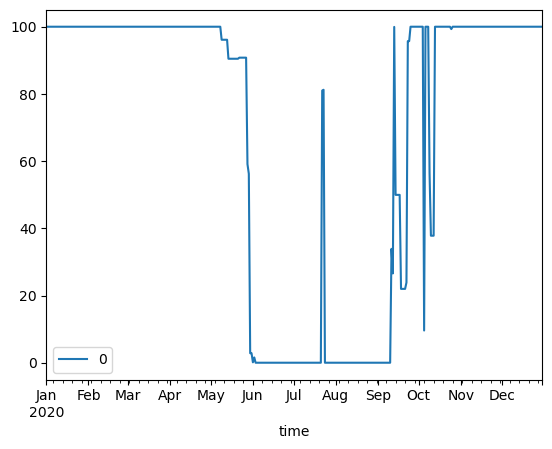

In [22]:
df_20.plot()

# 2021

In [23]:
year = 2021
path = r'C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\Alaska\2 IMS\ims_nc\IMS_' + str(year) + '.nc'
path

'C:\\Users\\mbonney\\OneDrive - NRCan RNCan\\Projects\\Alaska\\2 IMS\\ims_nc\\IMS_2021.nc'

In [24]:
%%time
ims = pputil.uploadNC(path, type = 'dataarray', chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1})
ims

CPU times: total: 0 ns
Wall time: 39.8 ms


<xarray.DataArray (time: 365, y: 73, x: 47)> Size: 1MB
dask.array<open_dataset-__xarray_dataarray_variable__, shape=(365, 73, 47), dtype=uint8, chunksize=(1, 73, 47), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 376B 4.002e+05 4.012e+05 ... 4.452e+05 4.462e+05
  * y            (y) float64 584B 7.679e+06 7.678e+06 ... 7.608e+06 7.607e+06
  * time         (time) datetime64[ns] 3kB 2021-01-01 2021-01-02 ... 2021-12-31
    variable     <U18 72B ...
    spatial_ref  int64 8B ...
Attributes: (12/50)
    geospatial_lon_min:         -180.0
    creator_institution:        U.S. National Ice Center (USNIC)
    id:                         G02156
    contributor_name:           U.S. National Ice Center, NOAA at NSIDC, NOAA...
    keywords:                   EARTH SCIENCE > CRYOSPHERE > SEA ICE > ICE EX...
    _FillValue:                 0
    ...                         ...
    contributor_role:           Producer, Publisher, Advisor, Software Develo...
    publisher_email:            nsidc@nsidc.org
    geospatial_lat_resolution:  1 km
    date_created:               2021-07-26T19:50:58Z
    license:                    These data may be redistributed and used with...
    cdm_data_type:              Grid

In [25]:
%%time
df_21 = gutil.cubeZonal(ims, area, condition = condition, valid = valid)
df_21

Converted cube to boolean (1 = Meets condition, 0 = Does not meet condition).
Calculated number of valid pixels for all zones (pixels = 3431, zones = 1).
Calculated number of pixels that met condition for all zones (1) and time-steps (365).
Created dataframe where each column is % pixels meeting condition across all time-steps for each zone.
CPU times: total: 1.72 s
Wall time: 3.53 s


,0
time,
2021-01-01,100.0
2021-01-02,100.0
2021-01-03,100.0
2021-01-04,100.0
2021-01-05,100.0
...,...
2021-12-27,100.0
2021-12-28,100.0
2021-12-29,100.0


<Axes: xlabel='time'>

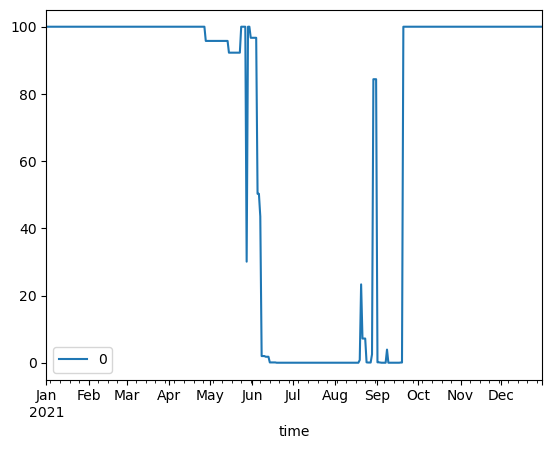

In [26]:
df_21.plot()

# 2022

In [27]:
year = 2022
path = r'C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\Alaska\2 IMS\ims_nc\IMS_' + str(year) + '.nc'
path

'C:\\Users\\mbonney\\OneDrive - NRCan RNCan\\Projects\\Alaska\\2 IMS\\ims_nc\\IMS_2022.nc'

In [28]:
%%time
ims = pputil.uploadNC(path, type = 'dataarray', chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1})
ims

CPU times: total: 0 ns
Wall time: 42.8 ms


<xarray.DataArray (time: 365, y: 73, x: 47)> Size: 1MB
dask.array<open_dataset-__xarray_dataarray_variable__, shape=(365, 73, 47), dtype=uint8, chunksize=(1, 73, 47), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 376B 4.002e+05 4.012e+05 ... 4.452e+05 4.462e+05
  * y            (y) float64 584B 7.679e+06 7.678e+06 ... 7.608e+06 7.607e+06
  * time         (time) datetime64[ns] 3kB 2022-01-01 2022-01-02 ... 2022-12-31
    variable     <U18 72B ...
    spatial_ref  int64 8B ...
Attributes: (12/50)
    _FillValue:                 0
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NESDIS Interactive Multisensor Snow and ...
    summary:                    This file contains a map of snow cover and ic...
    keywords:                   EARTH SCIENCE > CRYOSPHERE > SEA ICE > ICE EX...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Ke...
    ...                         ...
    metadata_link:              https://nsidc.org/data/G02156
    naming_authority:           org.nsidc
    references:                 Ramsay, B. H. (1998). The interactive multise...
    history:                    01 January 2022 00:35Z: NetCDF file generated...
    source:                     Analysts at the United States National Ice Ce...
    comment:                    The IMS product has changed versions and reso...

In [29]:
%%time
df_22 = gutil.cubeZonal(ims, area, condition = condition, valid = valid)
df_22

Converted cube to boolean (1 = Meets condition, 0 = Does not meet condition).
Calculated number of valid pixels for all zones (pixels = 3431, zones = 1).
Calculated number of pixels that met condition for all zones (1) and time-steps (365).
Created dataframe where each column is % pixels meeting condition across all time-steps for each zone.
CPU times: total: 1.78 s
Wall time: 3.71 s


,0
time,
2022-01-01,100.0
2022-01-02,100.0
2022-01-03,100.0
2022-01-04,100.0
2022-01-05,100.0
...,...
2022-12-27,100.0
2022-12-28,100.0
2022-12-29,100.0


<Axes: xlabel='time'>

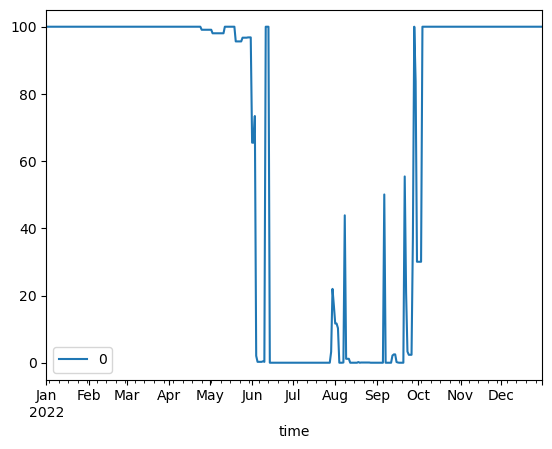

In [30]:
df_22.plot()

# 2023

In [31]:
year = 2023
path = r'C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\Alaska\2 IMS\ims_nc\IMS_' + str(year) + '.nc'
path

'C:\\Users\\mbonney\\OneDrive - NRCan RNCan\\Projects\\Alaska\\2 IMS\\ims_nc\\IMS_2023.nc'

In [32]:
%%time
ims = pputil.uploadNC(path, type = 'dataarray', chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1})
ims

CPU times: total: 0 ns
Wall time: 54.7 ms


<xarray.DataArray (time: 365, y: 73, x: 47)> Size: 1MB
dask.array<open_dataset-__xarray_dataarray_variable__, shape=(365, 73, 47), dtype=uint8, chunksize=(1, 73, 47), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 376B 4.002e+05 4.012e+05 ... 4.452e+05 4.462e+05
  * y            (y) float64 584B 7.679e+06 7.678e+06 ... 7.608e+06 7.607e+06
  * time         (time) datetime64[ns] 3kB 2023-01-01 2023-01-02 ... 2023-12-31
    variable     <U18 72B ...
    spatial_ref  int64 8B ...
Attributes: (12/50)
    _FillValue:                 0
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NESDIS Interactive Multisensor Snow and ...
    summary:                    This file contains a map of snow cover and ic...
    keywords:                   EARTH SCIENCE > CRYOSPHERE > SEA ICE > ICE EX...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Ke...
    ...                         ...
    metadata_link:              https://nsidc.org/data/G02156
    naming_authority:           org.nsidc
    references:                 Ramsay, B. H. (1998). The interactive multise...
    history:                    01 January 2023 00:35Z: NetCDF file generated...
    source:                     Analysts at the United States National Ice Ce...
    comment:                    The IMS product has changed versions and reso...

In [33]:
%%time
df_23 = gutil.cubeZonal(ims, area, condition = condition, valid = valid)
df_23

Converted cube to boolean (1 = Meets condition, 0 = Does not meet condition).
Calculated number of valid pixels for all zones (pixels = 3431, zones = 1).
Calculated number of pixels that met condition for all zones (1) and time-steps (365).
Created dataframe where each column is % pixels meeting condition across all time-steps for each zone.
CPU times: total: 1.91 s
Wall time: 3.52 s


,0
time,
2023-01-01,100.0
2023-01-02,100.0
2023-01-03,100.0
2023-01-04,100.0
2023-01-05,100.0
...,...
2023-12-27,100.0
2023-12-28,100.0
2023-12-29,100.0


<Axes: xlabel='time'>

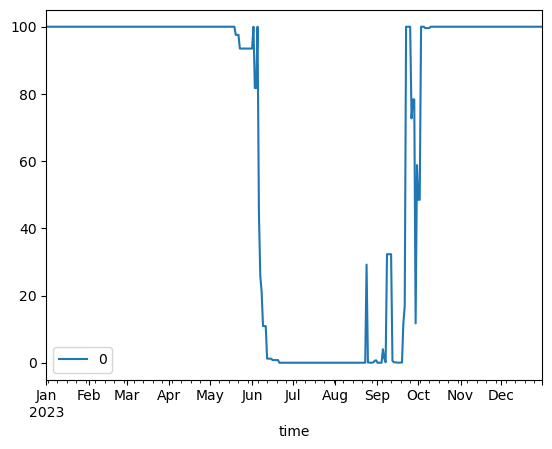

In [34]:
df_23.plot()

# Merge Dataframes

In [37]:
%%time
df = pd.concat((df_18, df_19, df_20, df_21, df_22, df_23))
df

CPU times: total: 0 ns
Wall time: 0 ns


,0
time,
2018-01-01,100.0
2018-01-02,100.0
2018-01-03,100.0
2018-01-04,100.0
2018-01-05,100.0
...,...
2023-12-27,100.0
2023-12-28,100.0
2023-12-29,100.0


<Axes: xlabel='time'>

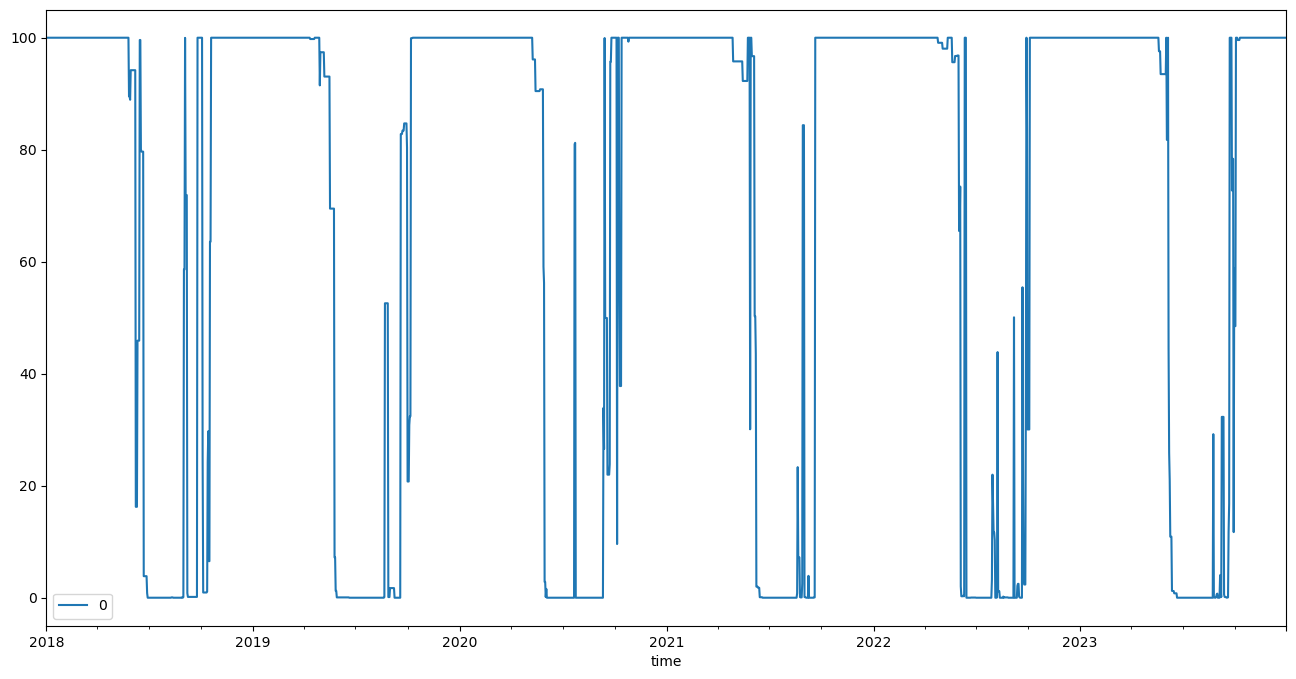

In [38]:
df.plot(figsize = (16, 8))

# Save

In [39]:
df.to_csv('IMS_pSnow_AlaskaSite.csv')